## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = len(merged_data['Mouse ID'].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
len(merged_data['Mouse ID']) - mouse_count
dup_mouse = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
len(merged_data.drop_duplicates()['Mouse ID'])

cleaned_mouse = merged_data[merged_data['Mouse ID'].isin(dup_mouse)==False]
cleaned_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse['Mouse ID'].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats = merged_data.groupby('Drug Regimen').count()
summary_stats['Mean'] = (merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
summary_stats['Median'] = (merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
summary_stats['Variance'] = (merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
summary_stats['Standard Deviation'] = (merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
summary_stats['SEM'] = (merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
summary_stats = summary_stats[['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']]
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

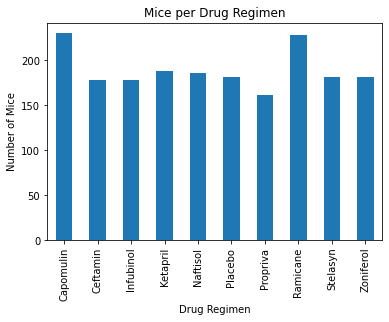

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_regimen = merged_data.groupby('Drug Regimen')
drug_regimen = mice_per_regimen['Mouse ID'].count()

regimen_chart = drug_regimen.plot(kind='bar', title = 'Mice per Drug Regimen')
regimen_chart.set_xlabel('Drug Regimen')
regimen_chart.set_ylabel('Number of Mice')

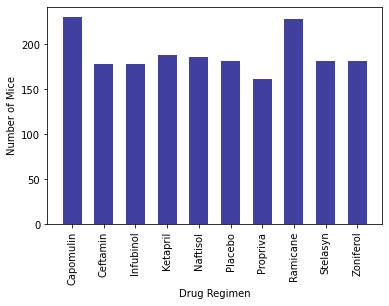

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot
x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_regimen.index.values, rotation='vertical')
plt.bar(x_axis, drug_regimen, width=0.60, color='navy', alpha=0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

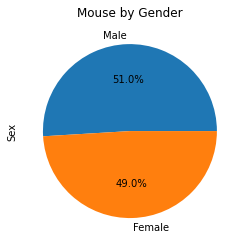

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = cleaned_mouse['Sex']
mouse_dist = mouse_gender.value_counts()
pie_chart = mouse_dist.plot(kind="pie", title="Mouse by Gender", autopct="%1.1f%%")

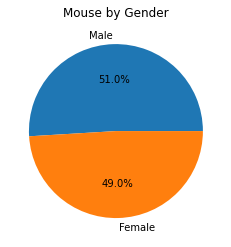

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', "Female"]
plt.pie(mouse_dist, labels=labels, autopct="%1.1f%%")
plt.title("Mouse by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_df = cleaned_mouse.loc[(cleaned_mouse['Drug Regimen']=='Capomulin') | 
                                 (cleaned_mouse['Drug Regimen']=='Ramicane') |
                                 (cleaned_mouse['Drug Regimen']=='Infubinol') | 
                                 (cleaned_mouse['Drug Regimen']=='Ceftamin'), :]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = treatment_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge = treatment_df.merge(timepoint_df, on=['Mouse ID', 'Timepoint'])
clean_merge = timepoint_merge.drop(columns = ['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites']).rename(
    columns = {'Tumor Volume (mm3)':'Tumor Vol'})
clean_merge

,Mouse ID,Drug Regimen,Timepoint,Tumor Vol
0,k403,Ramicane,45,22.050126
1,s185,Capomulin,45,23.343598
2,x401,Capomulin,45,28.484033
3,m601,Capomulin,45,28.430964
4,g791,Ramicane,45,29.128472
...,...,...,...,...
95,x822,Ceftamin,45,61.386660
96,y163,Infubinol,45,67.685569
97,y769,Ceftamin,45,68.594745
98,y865,Ceftamin,45,64.729837


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
# four_regimens = clean_merge['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for index, row in clean_merge.iterrows():
    quartiles = clean_merge['Tumor Vol'].quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

print(f'Quartiles: {quartiles}')
print(f'Lower Quartile: {lowerq}')
print(f'Upper Quartile: {upperq}')
print(f'Inner Quartile: {iqr}')

# Locate the rows which contain mice on each drug and get the tumor volumes

    
# add subset 
    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f'Values below {lower_bound} or above {upper_bound} could be outliers')

Quartiles: 0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Vol, dtype: float64
Lower Quartile: 37.187743802499995
Upper Quartile: 59.930261755000004
Inner Quartile: 22.74251795250001
Values below 3.0739668737499812 or above 94.04403868375002 could be outliers


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse = mouse_df['Tumor Volume (mm3)'].unique()
cap_mouse

mouse_id = cleaned_mouse.groupby(['Mouse ID', 'Drug Regimen'])
sum_mouse = mouse_id.sum()
sum_mouse

mouse = ('s185')

one_mouse = cleaned_mouse.loc[mouse]
one_mouse.head()

KeyError: 's185'

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
